In [1]:
# Importing Lib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style()
from keras.models import Sequential
from keras.layers import Dense

# Read the files

In [3]:
train_df = pd.read_csv('TRAIN.csv')
test_df = pd.read_csv('TEST.csv')

In [4]:
train_df.head(3)

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,31715,current,M,41,723,30292.00,NaN,2679.49,NaN,17032.745,...,8.0,73729.0,60073.14,58057.0,4.0,10.0,53560.0,NaN,3083.69,12163
1,23099,current,M,41,523,9552.05,1867.67,3806.00,473.43,2234.000,...,8.0,11600.0,8739.36,7716.0,2.0,12.0,7600.0,NaN,3953.04,680
2,20982,current,M,36,864,6204.21,NaN,830.60,NaN,1353.750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,200


In [5]:
test_df.head(3)

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,16174,current,M,40,324,32205.49,NaN,13836.470,NaN,17693.00,...,2.0,10.0,68309.0,73432.40,103856.00,3.0,13.0,68409.0,NaN,0.0
1,19966,current,M,31,344,12059.40,759.0,2839.640,NaN,4923.22,...,1.0,4.0,1000.0,21272.83,10349.00,2.0,8.0,10000.0,NaN,0.0
2,18105,saving,M,40,534,10832.31,NaN,8198.155,NaN,4299.00,...,5.0,2.0,50000.0,39504.00,30389.58,4.0,7.0,20000.0,NaN,6026.4


<ipython-input-6-af6a104a68f3>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(rows, cols, i + 1)
<ipython-input-6-af6a104a68f3>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(rows, cols, i + 1)
<ipython-input-6-af6a104a68f3>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(rows, cols, i + 1)
<ipython-input-6-af6a104a68f3>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(rows, cols, i + 1)


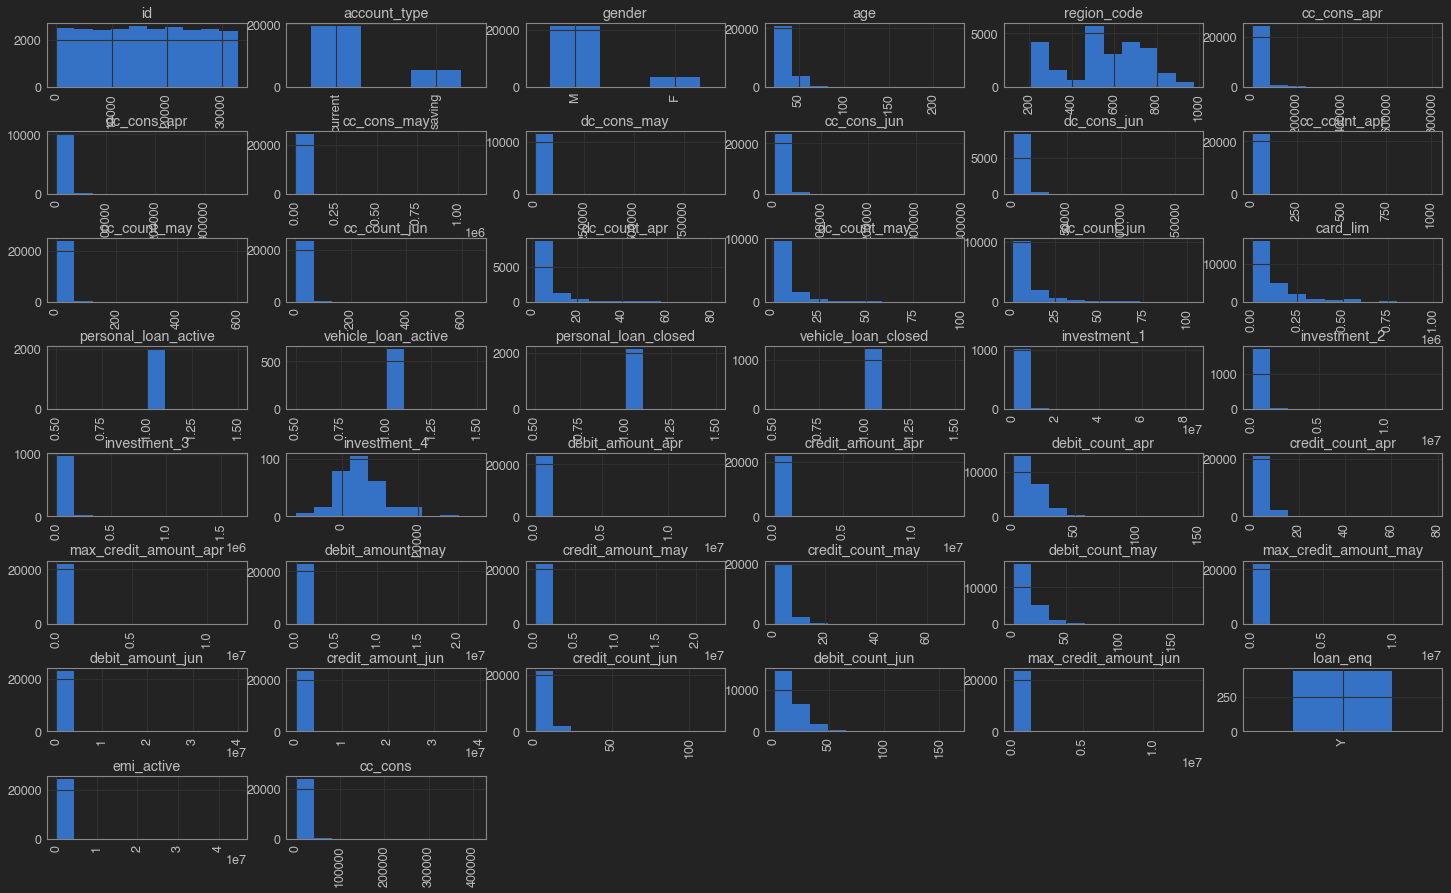

In [6]:
# code for data distribution 
df = train_df
fig = plt.figure(figsize=(25, 15))
cols = 6
rows = np.ceil(float(df.shape[1]) / cols)

for i, column in enumerate(df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [7]:
# code for to print all columns
pd.set_option('display.max_columns', None)
train_df.head(5)

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,31715,current,M,41,723,30292.00,NaN,2679.49,NaN,17032.745,NaN,3.0,2.0,3.0,NaN,NaN,NaN,200000.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,60454.78,58341.0,10.0,4.0,54240.0,74507.12,80827.0,6.0,8.0,73729.0,60073.14,58057.0,4.0,10.0,53560.0,NaN,3083.69,12163
1,23099,current,M,41,523,9552.05,1867.67,3806.00,473.43,2234.000,793.0,2.0,5.0,3.0,2.0,2.0,5.0,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32652.47,33714.0,19.0,2.0,20000.0,17774.43,19674.0,2.0,8.0,11600.0,8739.36,7716.0,2.0,12.0,7600.0,NaN,3953.04,680
2,20982,current,M,36,864,6204.21,NaN,830.60,NaN,1353.750,NaN,14.0,5.0,2.0,NaN,NaN,NaN,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,200
3,455,current,M,38,349,40877.62,NaN,19729.60,NaN,30446.610,NaN,12.0,8.0,10.0,NaN,NaN,NaN,50000.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3203.25,25067.0,3.0,1.0,24795.0,24059.24,25003.0,1.0,2.0,24859.0,54018.52,55597.0,3.0,4.0,30000.0,NaN,4059.07,1676
4,20382,current,M,48,523,10046.00,NaN,6046.00,NaN,1151.400,NaN,2.0,4.0,21.0,NaN,NaN,NaN,300000.0,NaN,NaN,NaN,1.0,1497586.08,NaN,50000.0,NaN,74823.50,41012.4,16.0,4.0,40000.0,91188.62,90567.5,7.0,15.0,50000.0,71310.50,130482.0,8.0,16.0,55000.0,NaN,5804.29,1603


In [8]:
# info of train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24615 entries, 0 to 24614
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     24615 non-null  int64  
 1   account_type           24615 non-null  object 
 2   gender                 24615 non-null  object 
 3   age                    24615 non-null  int64  
 4   region_code            24615 non-null  int64  
 5   cc_cons_apr            24615 non-null  float64
 6   dc_cons_apr            10276 non-null  float64
 7   cc_cons_may            24615 non-null  float64
 8   dc_cons_may            11595 non-null  float64
 9   cc_cons_jun            24615 non-null  float64
 10  dc_cons_jun            8678 non-null   float64
 11  cc_count_apr           22847 non-null  float64
 12  cc_count_may           23756 non-null  float64
 13  cc_count_jun           23437 non-null  float64
 14  dc_count_apr           10276 non-null  float64
 15  dc

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8205 entries, 0 to 8204
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     8205 non-null   int64  
 1   account_type           8205 non-null   object 
 2   gender                 8205 non-null   object 
 3   age                    8205 non-null   int64  
 4   region_code            8205 non-null   int64  
 5   cc_cons_apr            8205 non-null   float64
 6   dc_cons_apr            3492 non-null   float64
 7   cc_cons_may            8205 non-null   float64
 8   dc_cons_may            3886 non-null   float64
 9   cc_cons_jun            8205 non-null   float64
 10  dc_cons_jun            2845 non-null   float64
 11  cc_count_apr           7574 non-null   float64
 12  cc_count_may           7911 non-null   float64
 13  cc_count_jun           7793 non-null   float64
 14  dc_count_apr           3492 non-null   float64
 15  dc_c

In [10]:
# checking null values
train_df.isna().sum().sort_values()

id                           0
emi_active                   0
cc_cons_jun                  0
cc_cons_may                  0
cc_cons_apr                  0
cc_cons                      0
account_type                 0
age                          0
gender                       0
region_code                  0
card_lim                     6
cc_count_may               859
credit_count_jun          1172
debit_count_jun           1172
cc_count_jun              1178
max_credit_amount_jun     1186
credit_amount_jun         1186
debit_count_apr           1336
credit_count_apr          1336
debit_amount_apr          1426
debit_count_may           1574
credit_count_may          1574
debit_amount_jun          1695
debit_amount_may          1753
cc_count_apr              1768
credit_amount_apr         2520
max_credit_amount_apr     2520
max_credit_amount_may     2567
credit_amount_may         2567
dc_count_jun             11660
dc_count_may             13020
dc_cons_may              13020
dc_count

In [11]:
test_df.isna().sum().sort_values()

id                          0
cc_cons_jun                 0
cc_cons_may                 0
cc_cons_apr                 0
emi_active                  0
age                         0
gender                      0
region_code                 0
account_type                0
card_lim                    3
cc_count_may              294
credit_count_jun          356
debit_count_jun           356
credit_amount_jun         357
max_credit_amount_jun     357
cc_count_jun              412
credit_count_apr          422
debit_count_apr           422
debit_amount_apr          464
debit_count_may           497
credit_count_may          497
debit_amount_jun          500
debit_amount_may          548
cc_count_apr              631
credit_amount_apr         782
max_credit_amount_apr     782
credit_amount_may         838
max_credit_amount_may     838
dc_count_jun             3837
dc_count_may             4319
dc_cons_may              4319
dc_count_apr             4713
dc_cons_apr              4713
dc_cons_ju

In [12]:
# check the percentage of missing values
d = (train_df.isna().sum()/ len(train_df))*100

In [13]:
b = (test_df.isna().sum()/ len(test_df))*100
b

id                        0.000000
account_type              0.000000
gender                    0.000000
age                       0.000000
region_code               0.000000
cc_cons_apr               0.000000
dc_cons_apr              57.440585
cc_cons_may               0.000000
dc_cons_may              52.638635
cc_cons_jun               0.000000
dc_cons_jun              65.326021
cc_count_apr              7.690433
cc_count_may              3.583181
cc_count_jun              5.021328
dc_count_apr             57.440585
dc_count_may             52.638635
dc_count_jun             46.764168
card_lim                  0.036563
personal_loan_active     90.859232
vehicle_loan_active      97.404022
personal_loan_closed     91.115174
vehicle_loan_closed      95.076173
investment_1             95.295551
investment_2             92.516758
investment_3             95.904936
investment_4             98.732480
debit_amount_apr          5.655088
credit_amount_apr         9.530774
debit_count_apr     

In [14]:
# remove the features those have 50 percent missing values
for i in range(0,len(d)):
    if d[i][d[i] > 50]:
        col_drop = d.keys()[i]
        train_df = train_df.drop([col_drop],1)

<ipython-input-14-15dbd0f2bc7d>:3: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if d[i][d[i] > 50]:


In [15]:
for i in range(0,len(b)):
    if b[i][b[i] > 50]:
        col_drop = b.keys()[i]
        test_df = test_df.drop([col_drop],1)

<ipython-input-15-4048e6e4b08c>:2: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if b[i][b[i] > 50]:


In [16]:
train_df.shape

(24615, 30)

In [17]:
test_df.shape

(8205, 29)

In [18]:
# description of train data
train_df.describe()

,id,age,region_code,cc_cons_apr,cc_cons_may,cc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_jun,card_lim,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,24615.000000,24615.000000,24615.000000,24615.000000,2.461500e+04,24615.000000,22847.000000,23756.000000,23437.000000,12955.000000,24609.000000,2.318900e+04,2.209500e+04,23279.000000,23279.000000,2.209500e+04,2.286200e+04,2.204800e+04,23041.000000,23041.000000,2.204800e+04,2.292000e+04,2.342900e+04,23443.000000,23443.000000,2.342900e+04,2.461500e+04,24615.000000
mean,16352.306602,35.910867,554.286289,16724.699679,1.449078e+04,9034.903220,9.195649,9.605910,12.328071,7.906523,121636.324150,7.088840e+04,7.637680e+04,14.893466,3.796555,4.687195e+04,6.777295e+04,7.998758e+04,4.093703,13.939716,4.980322e+04,7.775094e+04,7.605872e+04,5.789404,16.023546,4.509387e+04,1.051152e+04,6833.298639
std,9422.382515,8.350756,188.502571,25557.121858,2.428710e+04,15579.128037,11.449178,9.884521,11.908281,9.108924,123600.524542,1.798309e+05,1.948909e+05,11.598500,3.514741,1.305665e+05,2.030006e+05,2.096595e+05,3.885775,11.501255,1.252070e+05,3.080153e+05,2.981304e+05,4.749826,13.415936,1.274878e+05,3.009496e+05,12689.409718
min,0.000000,22.000000,123.000000,233.970000,1.030000e+02,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.010000e+00,3.432000e+01,0.000000,0.000000,1.800000e-01,1.500000e-01,1.061000e+01,0.000000,0.000000,1.500000e-01,5.230000e+00,1.300000e+01,0.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,8182.500000,31.000000,425.000000,3707.050000,2.981930e+03,1626.000000,3.000000,3.000000,4.000000,2.000000,45000.000000,2.231772e+04,2.533200e+04,6.000000,2.000000,1.800000e+04,2.005925e+04,2.453975e+04,2.000000,6.000000,1.809474e+04,2.518399e+04,2.310900e+04,3.000000,6.000000,1.600000e+04,0.000000e+00,1275.500000
50%,16339.000000,34.000000,575.000000,8911.300000,7.338500e+03,4153.000000,7.000000,7.000000,9.000000,5.000000,75000.000000,4.113080e+04,4.399700e+04,12.000000,3.000000,2.804900e+04,3.821506e+04,4.527949e+04,3.000000,11.000000,3.000000e+04,4.616739e+04,4.313000e+04,5.000000,13.000000,2.685405e+04,1.676600e+02,3118.000000
75%,24435.500000,39.000000,683.000000,19896.860000,1.694145e+04,10224.570000,12.000000,13.000000,17.000000,10.000000,145000.000000,7.513563e+04,7.945350e+04,20.000000,5.000000,4.800000e+04,7.382796e+04,8.933325e+04,5.000000,19.000000,5.000000e+04,8.424984e+04,8.061868e+04,7.000000,22.000000,4.680320e+04,4.187245e+03,7310.000000
max,32820.000000,224.000000,977.000000,804712.580000,1.117246e+06,382914.100000,1012.000000,601.000000,653.000000,104.000000,1000000.000000,1.353571e+07,1.310058e+07,147.000000,78.000000,1.202915e+07,2.230122e+07,2.246350e+07,71.000000,171.000000,1.285103e+07,3.986881e+07,3.933931e+07,117.000000,164.000000,1.293238e+07,4.468722e+07,408630.000000


In [19]:
test_df.describe()

,id,age,region_code,cc_cons_apr,cc_cons_may,cc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_jun,card_lim,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
count,8205.000000,8205.000000,8205.000000,8205.000000,8205.000000,8205.000000,7574.000000,7911.000000,7793.000000,4368.000000,8202.000000,7.741000e+03,7.423000e+03,7783.000000,7783.000000,7.423000e+03,7.657000e+03,7.367000e+03,7708.000000,7708.000000,7.367000e+03,7.705000e+03,7.848000e+03,7849.000000,7849.000000,7.848000e+03,8.205000e+03
mean,16040.688239,36.074101,556.558440,16473.529718,14175.272239,9020.009896,9.061262,9.342814,12.210317,7.868819,121305.995977,6.745752e+04,7.253982e+04,14.868817,3.777464,4.527809e+04,6.507549e+04,7.841397e+04,4.068371,13.920083,4.937863e+04,7.713799e+04,7.516837e+04,5.703019,15.935406,4.369772e+04,6.735919e+03
std,9476.665735,9.045681,187.372124,23838.809556,21568.584145,16139.501509,8.500779,8.899412,11.110597,9.456998,121267.959795,1.041087e+05,1.119441e+05,11.563870,3.383456,6.897966e+04,1.189798e+05,1.802272e+05,3.732021,11.317050,1.387322e+05,3.312229e+05,3.294279e+05,4.567016,13.233265,1.017258e+05,4.661226e+04
min,7.000000,22.000000,123.000000,253.000000,141.000000,109.000000,1.000000,1.000000,1.000000,1.000000,0.000000,9.000000e+00,7.100000e+01,0.000000,0.000000,3.600000e-01,2.075000e+01,3.297000e+01,0.000000,0.000000,9.700000e-01,3.100000e+01,1.188000e+01,0.000000,0.000000,8.000000e-02,0.000000e+00
25%,7823.000000,31.000000,435.000000,3728.000000,2987.760000,1674.460000,3.000000,3.000000,4.000000,2.000000,45000.000000,2.221700e+04,2.525050e+04,6.000000,2.000000,1.800000e+04,2.028517e+04,2.508400e+04,2.000000,6.000000,1.838178e+04,2.483995e+04,2.289725e+04,3.000000,7.000000,1.600000e+04,0.000000e+00
50%,15896.000000,34.000000,575.000000,8913.120000,7304.010000,4118.000000,7.000000,7.000000,9.000000,4.000000,75000.000000,4.116549e+04,4.374500e+04,12.000000,3.000000,2.836000e+04,3.883601e+04,4.574800e+04,3.000000,11.000000,3.000000e+04,4.533675e+04,4.228899e+04,5.000000,13.000000,2.691400e+04,8.792000e+01
75%,24136.000000,39.000000,683.000000,20057.180000,16590.580000,9859.000000,12.000000,13.000000,17.000000,10.000000,148750.000000,7.639975e+04,8.050750e+04,20.000000,5.000000,4.782600e+04,7.358387e+04,8.888051e+04,5.000000,19.000000,5.000000e+04,8.376800e+04,8.116750e+04,7.000000,22.000000,4.800000e+04,4.143930e+03
max,32819.000000,223.000000,977.000000,456645.330000,441339.520000,302751.410000,136.000000,128.000000,121.000000,98.000000,1000000.000000,2.831121e+06,3.565671e+06,103.000000,54.000000,1.500000e+06,4.290603e+06,1.060175e+07,50.000000,88.000000,1.000000e+07,2.642915e+07,2.646773e+07,74.000000,144.000000,5.100000e+06,2.406307e+06


In [20]:
print(train_df['age'].unique())

[ 41  36  38  48  31  25  47  43  39  32  29  28  37  44  33  60  35  56
  40  49  30  45  34  46  54  26  27 120  53  42  57  52  51  67  55  58
  50  59  24  61  23  22  64  66  63 123 124  71  62  65  68  69  70 121
 224 222 220 219 118 221 223 119]


In [21]:
# Remove the customer records whose age is greater than 70
# train_df = train_df[train_df['age'] < 70]
# test_df = test_df[test_df['age'] < 70]

In [22]:
# convert categorical feature to numerical
t_df = pd.get_dummies(train_df,columns=['account_type','gender','region_code'],drop_first=True,)
t_df_1 = pd.get_dummies(test_df,columns=['account_type','gender','region_code'],drop_first=True,)

In [23]:
t_df.head(3)

,id,age,cc_cons_apr,cc_cons_may,cc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_jun,card_lim,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type_saving,gender_M,region_code_233,region_code_243,region_code_244,region_code_245,region_code_246,region_code_247,region_code_248,region_code_249,region_code_250,region_code_254,region_code_255,region_code_256,region_code_257,region_code_258,region_code_259,region_code_261,region_code_263,region_code_264,region_code_265,region_code_266,region_code_267,region_code_268,region_code_269,region_code_270,region_code_271,region_code_272,region_code_274,region_code_275,region_code_277,region_code_283,region_code_294,region_code_295,region_code_296,region_code_297,region_code_298,region_code_299,region_code_300,region_code_303,region_code_304,region_code_305,region_code_307,region_code_313,region_code_314,region_code_315,region_code_316,region_code_324,region_code_325,region_code_326,region_code_327,region_code_328,region_code_329,region_code_330,region_code_331,region_code_332,region_code_333,region_code_334,region_code_335,region_code_344,region_code_345,region_code_346,region_code_347,region_code_348,region_code_349,region_code_350,region_code_351,region_code_352,region_code_353,region_code_354,region_code_355,region_code_356,region_code_365,region_code_366,region_code_367,region_code_368,region_code_369,region_code_370,region_code_371,region_code_372,region_code_373,region_code_374,region_code_384,region_code_385,region_code_386,region_code_388,region_code_394,region_code_395,region_code_396,region_code_397,region_code_398,region_code_399,region_code_400,region_code_404,region_code_405,region_code_406,region_code_407,region_code_408,region_code_424,region_code_425,region_code_426,region_code_427,region_code_428,region_code_429,region_code_430,region_code_434,region_code_435,region_code_436,region_code_444,region_code_445,region_code_446,region_code_447,region_code_448,region_code_451,region_code_454,region_code_455,region_code_456,region_code_457,region_code_458,region_code_464,region_code_465,region_code_466,region_code_467,region_code_468,region_code_483,region_code_484,region_code_485,region_code_486,region_code_487,region_code_488,region_code_493,region_code_503,region_code_505,region_code_506,region_code_507,region_code_508,region_code_510,region_code_511,region_code_512,region_code_513,region_code_514,region_code_515,region_code_516,region_code_517,region_code_518,region_code_519,region_code_523,region_code_524,region_code_525,region_code_526,region_code_532,region_code_533,region_code_534,region_code_535,region_code_536,region_code_537,region_code_538,region_code_539,region_code_543,region_code_544,region_code_545,region_code_546,region_code_547,region_code_548,region_code_554,region_code_555,region_code_558,region_code_563,region_code_564,region_code_565,region_code_566,region_code_567,region_code_568,region_code_573,region_code_574,region_code_575,region_code_576,region_code_577,region_code_578,region_code_579,region_code_580,region_code_581,region_code_582,region_code_583,region_code_584,region_code_585,region_code_587,region_code_588,region_code_589,region_code_593,region_code_594,region_code_595,region_code_596,region_code_597,region_code_598,region_code_599,region_code_600,region_code_603,region_code_604,region_code_605,region_code_606,region_code_607,region_code_608,region_code_609,region_code_613,region_code_614,region_code_615,region_code_616,region_code_617,region_code_618,region_code_619,region_code_620,region_code_623,region_code_624,region_code_625,region_code_626,region_code_627,region_code_628,region_code_629,region_code_630,region_code_631,region_code_632,region_code_633,region_code_635,region_code_638,region_co

In [24]:
t_df.shape

(24615, 431)

In [25]:
t_df_1.head(3)

,id,age,cc_cons_apr,cc_cons_may,cc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_jun,card_lim,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_saving,gender_M,region_code_233,region_code_234,region_code_244,region_code_245,region_code_246,region_code_247,region_code_248,region_code_249,region_code_250,region_code_254,region_code_255,region_code_256,region_code_257,region_code_258,region_code_259,region_code_263,region_code_264,region_code_265,region_code_266,region_code_267,region_code_268,region_code_269,region_code_270,region_code_271,region_code_274,region_code_275,region_code_283,region_code_294,region_code_296,region_code_297,region_code_298,region_code_299,region_code_300,region_code_303,region_code_304,region_code_305,region_code_313,region_code_315,region_code_316,region_code_324,region_code_325,region_code_326,region_code_328,region_code_329,region_code_330,region_code_331,region_code_332,region_code_333,region_code_334,region_code_335,region_code_344,region_code_345,region_code_347,region_code_348,region_code_349,region_code_350,region_code_351,region_code_354,region_code_356,region_code_363,region_code_364,region_code_365,region_code_366,region_code_367,region_code_368,region_code_369,region_code_370,region_code_371,region_code_372,region_code_373,region_code_374,region_code_384,region_code_385,region_code_386,region_code_396,region_code_397,region_code_399,region_code_404,region_code_405,region_code_406,region_code_407,region_code_424,region_code_425,region_code_426,region_code_427,region_code_428,region_code_429,region_code_434,region_code_435,region_code_436,region_code_444,region_code_445,region_code_446,region_code_447,region_code_449,region_code_450,region_code_451,region_code_455,region_code_456,region_code_457,region_code_458,region_code_465,region_code_466,region_code_467,region_code_468,region_code_483,region_code_484,region_code_485,region_code_486,region_code_487,region_code_488,region_code_493,region_code_503,region_code_505,region_code_506,region_code_507,region_code_508,region_code_510,region_code_511,region_code_512,region_code_513,region_code_514,region_code_515,region_code_516,region_code_517,region_code_518,region_code_519,region_code_523,region_code_524,region_code_525,region_code_526,region_code_533,region_code_534,region_code_535,region_code_536,region_code_537,region_code_538,region_code_539,region_code_544,region_code_545,region_code_546,region_code_547,region_code_548,region_code_554,region_code_563,region_code_564,region_code_565,region_code_566,region_code_567,region_code_568,region_code_573,region_code_574,region_code_575,region_code_576,region_code_577,region_code_579,region_code_580,region_code_583,region_code_584,region_code_585,region_code_587,region_code_588,region_code_593,region_code_596,region_code_597,region_code_599,region_code_603,region_code_604,region_code_605,region_code_606,region_code_607,region_code_608,region_code_609,region_code_613,region_code_614,region_code_615,region_code_616,region_code_618,region_code_623,region_code_624,region_code_625,region_code_626,region_code_627,region_code_628,region_code_629,region_code_630,region_code_631,region_code_632,region_code_638,region_code_639,region_code_640,region_code_641,region_code_643,region_code_644,region_code_645,region_code_646,region_code_647,region_code_653,region_code_654,region_code_655,region_code_656,region_code_657,region_code_658,region_code_683,region_code_684,region_code_685,region_code_686,region_code_693,region_code_694,region_code_695,region_code_696,region_code_698,region_code_699,region_code_700,region_code_703,region_code_704,region_code_706,region_code_707,region_code_708,region_code_710,region_code_713,region_code_714,region_code_723,region_code_724,r

In [26]:
t_df.isna().sum()

id                 0
age                0
cc_cons_apr        0
cc_cons_may        0
cc_cons_jun        0
                  ..
region_code_970    0
region_code_971    0
region_code_974    0
region_code_975    0
region_code_977    0
Length: 431, dtype: int64

In [27]:
t_df_1.isna().sum()

id                 0
age                0
cc_cons_apr        0
cc_cons_may        0
cc_cons_jun        0
                  ..
region_code_969    0
region_code_970    0
region_code_971    0
region_code_975    0
region_code_977    0
Length: 374, dtype: int64

In [28]:
# Imputing missing values using SimpleImputer
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
my_imputer.fit(t_df)
t_df[:] = my_imputer.transform(t_df)

In [29]:
t_df

,id,age,cc_cons_apr,cc_cons_may,cc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_jun,card_lim,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type_saving,gender_M,region_code_233,region_code_243,region_code_244,region_code_245,region_code_246,region_code_247,region_code_248,region_code_249,region_code_250,region_code_254,region_code_255,region_code_256,region_code_257,region_code_258,region_code_259,region_code_261,region_code_263,region_code_264,region_code_265,region_code_266,region_code_267,region_code_268,region_code_269,region_code_270,region_code_271,region_code_272,region_code_274,region_code_275,region_code_277,region_code_283,region_code_294,region_code_295,region_code_296,region_code_297,region_code_298,region_code_299,region_code_300,region_code_303,region_code_304,region_code_305,region_code_307,region_code_313,region_code_314,region_code_315,region_code_316,region_code_324,region_code_325,region_code_326,region_code_327,region_code_328,region_code_329,region_code_330,region_code_331,region_code_332,region_code_333,region_code_334,region_code_335,region_code_344,region_code_345,region_code_346,region_code_347,region_code_348,region_code_349,region_code_350,region_code_351,region_code_352,region_code_353,region_code_354,region_code_355,region_code_356,region_code_365,region_code_366,region_code_367,region_code_368,region_code_369,region_code_370,region_code_371,region_code_372,region_code_373,region_code_374,region_code_384,region_code_385,region_code_386,region_code_388,region_code_394,region_code_395,region_code_396,region_code_397,region_code_398,region_code_399,region_code_400,region_code_404,region_code_405,region_code_406,region_code_407,region_code_408,region_code_424,region_code_425,region_code_426,region_code_427,region_code_428,region_code_429,region_code_430,region_code_434,region_code_435,region_code_436,region_code_444,region_code_445,region_code_446,region_code_447,region_code_448,region_code_451,region_code_454,region_code_455,region_code_456,region_code_457,region_code_458,region_code_464,region_code_465,region_code_466,region_code_467,region_code_468,region_code_483,region_code_484,region_code_485,region_code_486,region_code_487,region_code_488,region_code_493,region_code_503,region_code_505,region_code_506,region_code_507,region_code_508,region_code_510,region_code_511,region_code_512,region_code_513,region_code_514,region_code_515,region_code_516,region_code_517,region_code_518,region_code_519,region_code_523,region_code_524,region_code_525,region_code_526,region_code_532,region_code_533,region_code_534,region_code_535,region_code_536,region_code_537,region_code_538,region_code_539,region_code_543,region_code_544,region_code_545,region_code_546,region_code_547,region_code_548,region_code_554,region_code_555,region_code_558,region_code_563,region_code_564,region_code_565,region_code_566,region_code_567,region_code_568,region_code_573,region_code_574,region_code_575,region_code_576,region_code_577,region_code_578,region_code_579,region_code_580,region_code_581,region_code_582,region_code_583,region_code_584,region_code_585,region_code_587,region_code_588,region_code_589,region_code_593,region_code_594,region_code_595,region_code_596,region_code_597,region_code_598,region_code_599,region_code_600,region_code_603,region_code_604,region_code_605,region_code_606,region_code_607,region_code_608,region_code_609,region_code_613,region_code_614,region_code_615,region_code_616,region_code_617,region_code_618,region_code_619,region_code_620,region_code_623,region_code_624,region_code_625,region_code_626,region_code_627,region_code_628,region_code_629,region_code_630,region_code_631,region_code_632,region_code_633,region_code_635,region_code_638,region_co

In [30]:
t_df_1

,id,age,cc_cons_apr,cc_cons_may,cc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_jun,card_lim,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_saving,gender_M,region_code_233,region_code_234,region_code_244,region_code_245,region_code_246,region_code_247,region_code_248,region_code_249,region_code_250,region_code_254,region_code_255,region_code_256,region_code_257,region_code_258,region_code_259,region_code_263,region_code_264,region_code_265,region_code_266,region_code_267,region_code_268,region_code_269,region_code_270,region_code_271,region_code_274,region_code_275,region_code_283,region_code_294,region_code_296,region_code_297,region_code_298,region_code_299,region_code_300,region_code_303,region_code_304,region_code_305,region_code_313,region_code_315,region_code_316,region_code_324,region_code_325,region_code_326,region_code_328,region_code_329,region_code_330,region_code_331,region_code_332,region_code_333,region_code_334,region_code_335,region_code_344,region_code_345,region_code_347,region_code_348,region_code_349,region_code_350,region_code_351,region_code_354,region_code_356,region_code_363,region_code_364,region_code_365,region_code_366,region_code_367,region_code_368,region_code_369,region_code_370,region_code_371,region_code_372,region_code_373,region_code_374,region_code_384,region_code_385,region_code_386,region_code_396,region_code_397,region_code_399,region_code_404,region_code_405,region_code_406,region_code_407,region_code_424,region_code_425,region_code_426,region_code_427,region_code_428,region_code_429,region_code_434,region_code_435,region_code_436,region_code_444,region_code_445,region_code_446,region_code_447,region_code_449,region_code_450,region_code_451,region_code_455,region_code_456,region_code_457,region_code_458,region_code_465,region_code_466,region_code_467,region_code_468,region_code_483,region_code_484,region_code_485,region_code_486,region_code_487,region_code_488,region_code_493,region_code_503,region_code_505,region_code_506,region_code_507,region_code_508,region_code_510,region_code_511,region_code_512,region_code_513,region_code_514,region_code_515,region_code_516,region_code_517,region_code_518,region_code_519,region_code_523,region_code_524,region_code_525,region_code_526,region_code_533,region_code_534,region_code_535,region_code_536,region_code_537,region_code_538,region_code_539,region_code_544,region_code_545,region_code_546,region_code_547,region_code_548,region_code_554,region_code_563,region_code_564,region_code_565,region_code_566,region_code_567,region_code_568,region_code_573,region_code_574,region_code_575,region_code_576,region_code_577,region_code_579,region_code_580,region_code_583,region_code_584,region_code_585,region_code_587,region_code_588,region_code_593,region_code_596,region_code_597,region_code_599,region_code_603,region_code_604,region_code_605,region_code_606,region_code_607,region_code_608,region_code_609,region_code_613,region_code_614,region_code_615,region_code_616,region_code_618,region_code_623,region_code_624,region_code_625,region_code_626,region_code_627,region_code_628,region_code_629,region_code_630,region_code_631,region_code_632,region_code_638,region_code_639,region_code_640,region_code_641,region_code_643,region_code_644,region_code_645,region_code_646,region_code_647,region_code_653,region_code_654,region_code_655,region_code_656,region_code_657,region_code_658,region_code_683,region_code_684,region_code_685,region_code_686,region_code_693,region_code_694,region_code_695,region_code_696,region_code_698,region_code_699,region_code_700,region_code_703,region_code_704,region_code_706,region_code_707,region_code_708,region_code_710,region_code_713,region_code_714,region_code_723,region_code_724,r

In [31]:
t_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8205 entries, 0 to 8204
Columns: 374 entries, id to region_code_977
dtypes: float64(24), int64(2), uint8(348)
memory usage: 4.4 MB


In [32]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
my_imputer.fit(t_df_1)
t_df_1[:] = my_imputer.transform(t_df_1)

In [33]:
# drop id column
t_df.drop(['id'],1,inplace=True)
t_df_1.drop(['id'],1,inplace=True)

In [34]:
# import library for rescaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
# function to rescale numerical columns
def rescale(data):
    # creating an instance of the scaler object
    scaler = StandardScaler()
    data1= scaler.fit(data)
    data[:] = scaler.transform(data)
    return data[:]
t_df = rescale(t_df)
# t_df_1 = rescale(t_df_1)

In [35]:
t_df.head(3)

,age,cc_cons_apr,cc_cons_may,cc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_jun,card_lim,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type_saving,gender_M,region_code_233,region_code_243,region_code_244,region_code_245,region_code_246,region_code_247,region_code_248,region_code_249,region_code_250,region_code_254,region_code_255,region_code_256,region_code_257,region_code_258,region_code_259,region_code_261,region_code_263,region_code_264,region_code_265,region_code_266,region_code_267,region_code_268,region_code_269,region_code_270,region_code_271,region_code_272,region_code_274,region_code_275,region_code_277,region_code_283,region_code_294,region_code_295,region_code_296,region_code_297,region_code_298,region_code_299,region_code_300,region_code_303,region_code_304,region_code_305,region_code_307,region_code_313,region_code_314,region_code_315,region_code_316,region_code_324,region_code_325,region_code_326,region_code_327,region_code_328,region_code_329,region_code_330,region_code_331,region_code_332,region_code_333,region_code_334,region_code_335,region_code_344,region_code_345,region_code_346,region_code_347,region_code_348,region_code_349,region_code_350,region_code_351,region_code_352,region_code_353,region_code_354,region_code_355,region_code_356,region_code_365,region_code_366,region_code_367,region_code_368,region_code_369,region_code_370,region_code_371,region_code_372,region_code_373,region_code_374,region_code_384,region_code_385,region_code_386,region_code_388,region_code_394,region_code_395,region_code_396,region_code_397,region_code_398,region_code_399,region_code_400,region_code_404,region_code_405,region_code_406,region_code_407,region_code_408,region_code_424,region_code_425,region_code_426,region_code_427,region_code_428,region_code_429,region_code_430,region_code_434,region_code_435,region_code_436,region_code_444,region_code_445,region_code_446,region_code_447,region_code_448,region_code_451,region_code_454,region_code_455,region_code_456,region_code_457,region_code_458,region_code_464,region_code_465,region_code_466,region_code_467,region_code_468,region_code_483,region_code_484,region_code_485,region_code_486,region_code_487,region_code_488,region_code_493,region_code_503,region_code_505,region_code_506,region_code_507,region_code_508,region_code_510,region_code_511,region_code_512,region_code_513,region_code_514,region_code_515,region_code_516,region_code_517,region_code_518,region_code_519,region_code_523,region_code_524,region_code_525,region_code_526,region_code_532,region_code_533,region_code_534,region_code_535,region_code_536,region_code_537,region_code_538,region_code_539,region_code_543,region_code_544,region_code_545,region_code_546,region_code_547,region_code_548,region_code_554,region_code_555,region_code_558,region_code_563,region_code_564,region_code_565,region_code_566,region_code_567,region_code_568,region_code_573,region_code_574,region_code_575,region_code_576,region_code_577,region_code_578,region_code_579,region_code_580,region_code_581,region_code_582,region_code_583,region_code_584,region_code_585,region_code_587,region_code_588,region_code_589,region_code_593,region_code_594,region_code_595,region_code_596,region_code_597,region_code_598,region_code_599,region_code_600,region_code_603,region_code_604,region_code_605,region_code_606,region_code_607,region_code_608,region_code_609,region_code_613,region_code_614,region_code_615,region_code_616,region_code_617,region_code_618,region_code_619,region_code_620,region_code_623,region_code_624,region_code_625,region_code_626,region_code_627,region_code_628,region_code_629,region_code_630,region_code_631,region_code_632,region_code_633,region_code_635,region_code_638,region_code_

In [36]:
# converting negative value to positive
for i in t_df:
    t_df[i] = t_df[i].abs()

In [37]:
t_df.head(3)

,age,cc_cons_apr,cc_cons_may,cc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_jun,card_lim,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type_saving,gender_M,region_code_233,region_code_243,region_code_244,region_code_245,region_code_246,region_code_247,region_code_248,region_code_249,region_code_250,region_code_254,region_code_255,region_code_256,region_code_257,region_code_258,region_code_259,region_code_261,region_code_263,region_code_264,region_code_265,region_code_266,region_code_267,region_code_268,region_code_269,region_code_270,region_code_271,region_code_272,region_code_274,region_code_275,region_code_277,region_code_283,region_code_294,region_code_295,region_code_296,region_code_297,region_code_298,region_code_299,region_code_300,region_code_303,region_code_304,region_code_305,region_code_307,region_code_313,region_code_314,region_code_315,region_code_316,region_code_324,region_code_325,region_code_326,region_code_327,region_code_328,region_code_329,region_code_330,region_code_331,region_code_332,region_code_333,region_code_334,region_code_335,region_code_344,region_code_345,region_code_346,region_code_347,region_code_348,region_code_349,region_code_350,region_code_351,region_code_352,region_code_353,region_code_354,region_code_355,region_code_356,region_code_365,region_code_366,region_code_367,region_code_368,region_code_369,region_code_370,region_code_371,region_code_372,region_code_373,region_code_374,region_code_384,region_code_385,region_code_386,region_code_388,region_code_394,region_code_395,region_code_396,region_code_397,region_code_398,region_code_399,region_code_400,region_code_404,region_code_405,region_code_406,region_code_407,region_code_408,region_code_424,region_code_425,region_code_426,region_code_427,region_code_428,region_code_429,region_code_430,region_code_434,region_code_435,region_code_436,region_code_444,region_code_445,region_code_446,region_code_447,region_code_448,region_code_451,region_code_454,region_code_455,region_code_456,region_code_457,region_code_458,region_code_464,region_code_465,region_code_466,region_code_467,region_code_468,region_code_483,region_code_484,region_code_485,region_code_486,region_code_487,region_code_488,region_code_493,region_code_503,region_code_505,region_code_506,region_code_507,region_code_508,region_code_510,region_code_511,region_code_512,region_code_513,region_code_514,region_code_515,region_code_516,region_code_517,region_code_518,region_code_519,region_code_523,region_code_524,region_code_525,region_code_526,region_code_532,region_code_533,region_code_534,region_code_535,region_code_536,region_code_537,region_code_538,region_code_539,region_code_543,region_code_544,region_code_545,region_code_546,region_code_547,region_code_548,region_code_554,region_code_555,region_code_558,region_code_563,region_code_564,region_code_565,region_code_566,region_code_567,region_code_568,region_code_573,region_code_574,region_code_575,region_code_576,region_code_577,region_code_578,region_code_579,region_code_580,region_code_581,region_code_582,region_code_583,region_code_584,region_code_585,region_code_587,region_code_588,region_code_589,region_code_593,region_code_594,region_code_595,region_code_596,region_code_597,region_code_598,region_code_599,region_code_600,region_code_603,region_code_604,region_code_605,region_code_606,region_code_607,region_code_608,region_code_609,region_code_613,region_code_614,region_code_615,region_code_616,region_code_617,region_code_618,region_code_619,region_code_620,region_code_623,region_code_624,region_code_625,region_code_626,region_code_627,region_code_628,region_code_629,region_code_630,region_code_631,region_code_632,region_code_633,region_code_635,region_code_638,region_code_

In [38]:
t_df_1.head(3)

,age,cc_cons_apr,cc_cons_may,cc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_jun,card_lim,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_saving,gender_M,region_code_233,region_code_234,region_code_244,region_code_245,region_code_246,region_code_247,region_code_248,region_code_249,region_code_250,region_code_254,region_code_255,region_code_256,region_code_257,region_code_258,region_code_259,region_code_263,region_code_264,region_code_265,region_code_266,region_code_267,region_code_268,region_code_269,region_code_270,region_code_271,region_code_274,region_code_275,region_code_283,region_code_294,region_code_296,region_code_297,region_code_298,region_code_299,region_code_300,region_code_303,region_code_304,region_code_305,region_code_313,region_code_315,region_code_316,region_code_324,region_code_325,region_code_326,region_code_328,region_code_329,region_code_330,region_code_331,region_code_332,region_code_333,region_code_334,region_code_335,region_code_344,region_code_345,region_code_347,region_code_348,region_code_349,region_code_350,region_code_351,region_code_354,region_code_356,region_code_363,region_code_364,region_code_365,region_code_366,region_code_367,region_code_368,region_code_369,region_code_370,region_code_371,region_code_372,region_code_373,region_code_374,region_code_384,region_code_385,region_code_386,region_code_396,region_code_397,region_code_399,region_code_404,region_code_405,region_code_406,region_code_407,region_code_424,region_code_425,region_code_426,region_code_427,region_code_428,region_code_429,region_code_434,region_code_435,region_code_436,region_code_444,region_code_445,region_code_446,region_code_447,region_code_449,region_code_450,region_code_451,region_code_455,region_code_456,region_code_457,region_code_458,region_code_465,region_code_466,region_code_467,region_code_468,region_code_483,region_code_484,region_code_485,region_code_486,region_code_487,region_code_488,region_code_493,region_code_503,region_code_505,region_code_506,region_code_507,region_code_508,region_code_510,region_code_511,region_code_512,region_code_513,region_code_514,region_code_515,region_code_516,region_code_517,region_code_518,region_code_519,region_code_523,region_code_524,region_code_525,region_code_526,region_code_533,region_code_534,region_code_535,region_code_536,region_code_537,region_code_538,region_code_539,region_code_544,region_code_545,region_code_546,region_code_547,region_code_548,region_code_554,region_code_563,region_code_564,region_code_565,region_code_566,region_code_567,region_code_568,region_code_573,region_code_574,region_code_575,region_code_576,region_code_577,region_code_579,region_code_580,region_code_583,region_code_584,region_code_585,region_code_587,region_code_588,region_code_593,region_code_596,region_code_597,region_code_599,region_code_603,region_code_604,region_code_605,region_code_606,region_code_607,region_code_608,region_code_609,region_code_613,region_code_614,region_code_615,region_code_616,region_code_618,region_code_623,region_code_624,region_code_625,region_code_626,region_code_627,region_code_628,region_code_629,region_code_630,region_code_631,region_code_632,region_code_638,region_code_639,region_code_640,region_code_641,region_code_643,region_code_644,region_code_645,region_code_646,region_code_647,region_code_653,region_code_654,region_code_655,region_code_656,region_code_657,region_code_658,region_code_683,region_code_684,region_code_685,region_code_686,region_code_693,region_code_694,region_code_695,region_code_696,region_code_698,region_code_699,region_code_700,region_code_703,region_code_704,region_code_706,region_code_707,region_code_708,region_code_710,region_code_713,region_code_714,region_code_723,region_code_724,regi

In [39]:
sel_f_ = t_df_1.columns.intersection(t_df.columns)

In [40]:
sel_f_.unique()

Index(['age', 'cc_cons_apr', 'cc_cons_may', 'cc_cons_jun', 'cc_count_apr',
       'cc_count_may', 'cc_count_jun', 'dc_count_jun', 'card_lim',
       'debit_amount_apr',
       ...
       'region_code_957', 'region_code_964', 'region_code_965',
       'region_code_966', 'region_code_967', 'region_code_969',
       'region_code_970', 'region_code_971', 'region_code_975',
       'region_code_977'],
      dtype='object', length=363)

In [41]:
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.model_selection import train_test_split 

In [42]:
t_dff = t_df[sel_f_]
t_dff_1 = t_df_1[sel_f_]

[2.35864075e-02 7.30746142e-02 5.75220966e-02 1.39521349e-01
 2.35967186e-02 2.34669071e-02 2.69136990e-02 2.28884869e-02
 3.93047340e-02 2.00481315e-02 2.00920861e-02 2.20199608e-02
 1.85816740e-02 1.63793697e-02 2.22120130e-02 2.12776615e-02
 1.99352472e-02 2.15202533e-02 1.84025139e-02 1.96246852e-02
 1.92963312e-02 1.67887877e-02 1.93192297e-02 2.11160708e-02
 3.71501726e-02 1.36455735e-02 1.85814139e-02 1.14739903e-02
 1.62858872e-03 6.91262677e-03 1.07661065e-04 5.45756858e-05
 2.11433338e-04 9.94872481e-06 1.52638934e-04 4.75074104e-05
 1.22088954e-04 1.45001598e-05 4.79898987e-04 1.93725278e-04
 6.12115872e-05 2.63226764e-02 4.00088543e-04 4.10053100e-05
 4.54754944e-04 4.39346526e-04 1.43818080e-05 4.42129783e-05
 1.09732726e-04 1.71416058e-04 1.17965907e-04 5.31120253e-05
 1.08260792e-03 1.36922102e-04 2.51505544e-04 4.04224913e-05
 1.24056041e-06 1.35291595e-04 1.52411148e-06 2.67081967e-04
 1.14008453e-05 4.58407929e-06 1.50873058e-03 4.36073191e-05
 6.25711882e-07 4.158321

<AxesSubplot:>

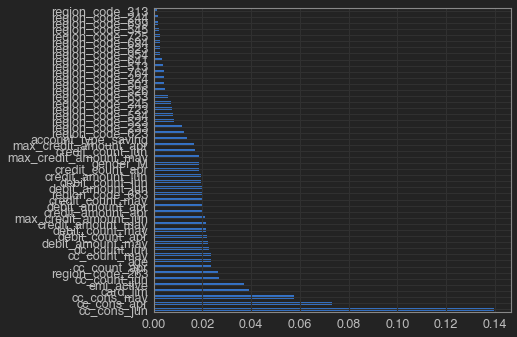

In [43]:
# extratreeregressor for feature selection
X1 = t_dff#.drop(['cc_cons'],1)
y1 = t_df['cc_cons']
model_features_importance=ExtraTreesRegressor()
model_features_importance.fit(X1,y1)
print(model_features_importance.feature_importances_)
ranked_features=pd.Series(model_features_importance.feature_importances_,index=X1.columns)
ranked_features.nlargest(50).plot(kind='barh')

In [54]:
# select top features 
sel_f = ranked_features.nlargest(50).index

In [55]:
f_df = t_df[sel_f]
ft_df = t_df_1[sel_f]
X = f_df#.drop(['cc_cons'],1)
y = t_df['cc_cons']

In [56]:
ft_df.shape

(8205, 50)

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
model = SVR() 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X, y) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.037, total= 1.1min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.038, total= 1.1min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.1min remaining:    0.0s


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.030, total=  47.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.025, total=  51.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.024, total=  53.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.016, total=  23.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.013, total=  24.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.005, total=  25.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.010, total=  29.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

KeyboardInterrupt: 

In [47]:
# # modelling using tf
# model = Sequential()
# # model.add(Dense(23, kernel_initializer='normal', activation='relu'))
# model.add(Dense(15, kernel_initializer='normal', activation='relu'))
# model.add(Dense(2, kernel_initializer='normal', activation='relu'))
# model.add(Dense(1, kernel_initializer='normal'))
# # Compile model
# model.compile(loss='mean_squared_logarithmic_error', optimizer='adam')

In [48]:
# fit the data on model
# model.fit(X,y,epochs=1)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

770/770 [==============================] - 1s 1ms/step - loss: 0.2041


In [ ]:
# prediction on test dataset
y_pred_f = grid.predict(ft_df)

In [ ]:
# convert into dataframe
dt = pd.DataFrame(y_pred_f)

In [ ]:
# create dataframe for output
output = pd.DataFrame(data={"id":test_df['id'],"cc_cons":dt[0]})
output.to_csv('Mangesh_credit_f.csv',index=False)

In [ ]:
output